


Hogwarts Legacy is a game about Harry Potter Universe released in 2023 made by collaboration of Warner Bros, Avalanche Software and Portkey Games. It showcases the life and roleplay of students in Hogwarts - School of Witchcraft and Wizardry in 1800. The player controls a character going through challenges and missions while attending the school and making various friendships with many characters.

In this analysis, datatset of reviews of the game were used to showcase the opinion of users in the last two years. This dataset is derived from kaggle and will showcase the positive, negative and neutral reviews using 3 Machine Learning models - Logistic Regression, SVM and Random Forest Classifier. After that, we hypertuned models to have the best output possible from dataset.








In [1]:
import pandas as pd

# Load the dataset to examine its structure
file_path = 'hogwarts_legacy_reviews.csv'
hogwarts_reviews = pd.read_csv(file_path)

# Displaying the first few rows and summary of the dataset
hogwarts_reviews_info = {
    "head": hogwarts_reviews.head(),
    "info": hogwarts_reviews.info(),
    "columns": hogwarts_reviews.columns.tolist()
}

hogwarts_reviews_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  46405 non-null  int64 
 1   Playtime    46405 non-null  int64 
 2   Feedback    46405 non-null  object
 3   Review      46404 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


{'head':    Unnamed: 0  Playtime  Feedback  \
 0           0        16  Positive   
 1           1        26  Positive   
 2           2        29  Positive   
 3           3        24  Positive   
 4           4         7  Positive   
 
                                               Review  
 0                                      Greattt Game!  
 1  9/10Fantastic experience. A true Wizarding Wor...  
 2                                           worth it  
 3  I've been waiting 84 YEARSSSSSSSS.The game is ...  
 4       very fun game (it is not transphobic at all)  ,
 'info': None,
 'columns': ['Unnamed: 0', 'Playtime', 'Feedback', 'Review']}

In [2]:
# Step 1: Data Cleaning and Preparation

# Drop unnecessary columns
hogwarts_reviews_cleaned = hogwarts_reviews.drop(columns=['Unnamed: 0'])

# Drop rows with missing reviews
hogwarts_reviews_cleaned = hogwarts_reviews_cleaned.dropna(subset=['Review'])

# Display basic information about the cleaned dataset
cleaned_info = {
    "shape": hogwarts_reviews_cleaned.shape,
    "sample_data": hogwarts_reviews_cleaned.head()
}

cleaned_info

{'shape': (46404, 3),
 'sample_data':    Playtime  Feedback                                             Review
 0        16  Positive                                      Greattt Game!
 1        26  Positive  9/10Fantastic experience. A true Wizarding Wor...
 2        29  Positive                                           worth it
 3        24  Positive  I've been waiting 84 YEARSSSSSSSS.The game is ...
 4         7  Positive       very fun game (it is not transphobic at all)}

In [3]:
import re
# Simplified text preprocessing without external downloads
def preprocess_text_simplified(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text by splitting on spaces
    tokens = text.split()
    # Basic stopword removal (manual list for simplicity)
    stop_words = {'the', 'and', 'is', 'it', 'a', 'of', 'in', 'to', 'on', 'for', 'with', 'at', 'this', 'that'}
    tokens = [word for word in tokens if word not in stop_words]
    # Return processed text as a string
    return ' '.join(tokens)

# Apply preprocessing to the "Review" column
hogwarts_reviews_cleaned['Cleaned_Review'] = hogwarts_reviews_cleaned['Review'].apply(preprocess_text_simplified)

# Display a few examples of the cleaned text
simplified_preprocessed_samples = hogwarts_reviews_cleaned[['Review', 'Cleaned_Review']].head()
simplified_preprocessed_samples


,Review,Cleaned_Review
0,Greattt Game!,greattt game
1,9/10Fantastic experience. A true Wizarding Wor...,fantastic experience true wizarding world expe...
2,worth it,worth
3,I've been waiting 84 YEARSSSSSSSS.The game is ...,ive been waiting yearssssssssthe game everythi...
4,very fun game (it is not transphobic at all),very fun game not transphobic all


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization (without limiting the number of features)
tfidf_vectorizer_full = TfidfVectorizer()
X_full = tfidf_vectorizer_full.fit_transform(hogwarts_reviews_cleaned['Cleaned_Review'])

# Check the dimensions of the resulting TF-IDF matrix
X_full_shape = X_full.shape

X_full_shape  # Number of reviews and features extracted


(46404, 29204)

In [12]:
# Step 2: Define target variable
y = hogwarts_reviews_cleaned['Feedback']

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 3: Split dataset
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train Logistic Regression
logistic_model_full = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_full.fit(X_train_full, y_train_full)
y_pred_logistic_full = logistic_model_full.predict(X_test_full)

# Step 5: Train Support Vector Machine
svm_model_full = SVC(kernel='linear', random_state=42)
svm_model_full.fit(X_train_full, y_train_full)
y_pred_svm_full = svm_model_full.predict(X_test_full)

# Step 6: Evaluate Logistic Regression
logistic_report_full = classification_report(y_test_full, y_pred_logistic_full)
logistic_conf_matrix_full = confusion_matrix(y_test_full, y_pred_logistic_full)

# Step 7: Evaluate SVM
svm_report_full = classification_report(y_test_full, y_pred_svm_full)
svm_conf_matrix_full = confusion_matrix(y_test_full, y_pred_svm_full)

# Split the data into training and testing sets for Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_full, hogwarts_reviews_cleaned['Feedback'], test_size=0.2, random_state=42)

# Random Forest Model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = random_forest.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Output results
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(report_rf)

print("Logistic Regression Classification Report:\n", logistic_report_full)
print("Logistic Regression Confusion Matrix:\n", logistic_conf_matrix_full)

print("\nSVM Classification Report:\n", svm_report_full)
print("SVM Confusion Matrix:\n", svm_conf_matrix_full)


Random Forest Accuracy: 0.96
Random Forest Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.46      0.62       685
    Positive       0.96      1.00      0.98      8596

    accuracy                           0.96      9281
   macro avg       0.95      0.73      0.80      9281
weighted avg       0.96      0.96      0.95      9281

Logistic Regression Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.60      0.73       721
    Positive       0.97      1.00      0.98      8560

    accuracy                           0.96      9281
   macro avg       0.94      0.80      0.85      9281
weighted avg       0.96      0.96      0.96      9281

Logistic Regression Confusion Matrix:
 [[ 434  287]
 [  42 8518]]

SVM Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.70      0.78       721
    Positive       0.98      0.9

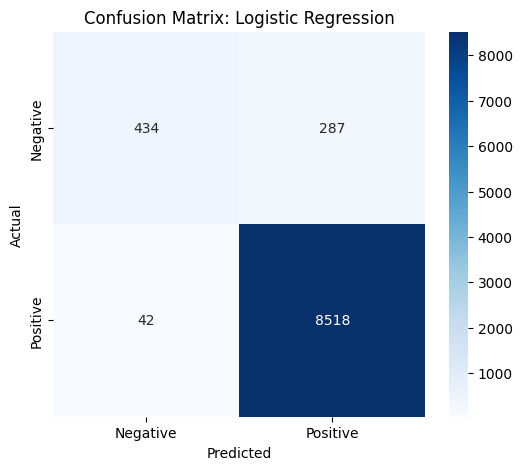

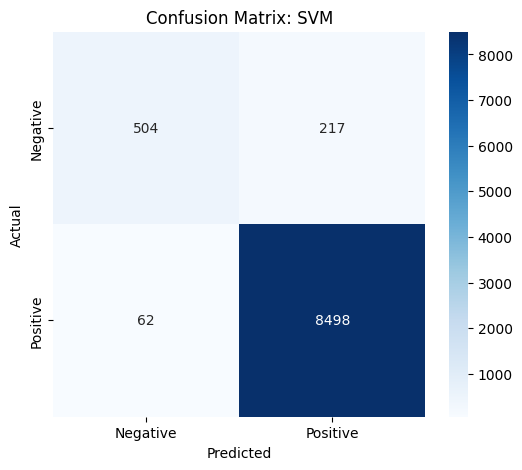

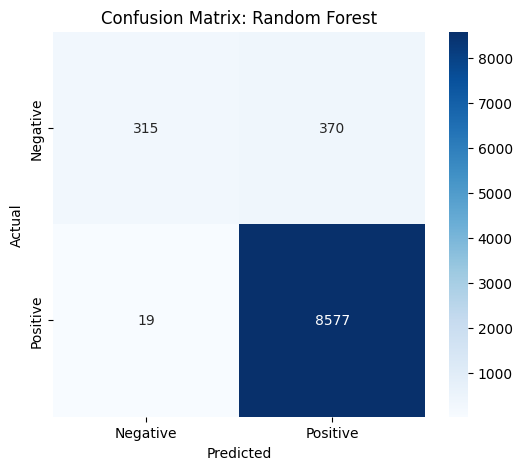

In [14]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Recompute confusion matrices if needed
logistic_conf_matrix_full = confusion_matrix(y_test_full, y_pred_logistic_full)
svm_conf_matrix_full = confusion_matrix(y_test_full, y_pred_svm_full)

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(logistic_conf_matrix_full, "Confusion Matrix: Logistic Regression")

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_conf_matrix_full, "Confusion Matrix: SVM")

# Generate confusion matrix for Random Forest
rf_conf_matrix_full = confusion_matrix(y_test, y_pred_rf) #Changed y_test_full to y_test and y_pred_rf_full to y_pred_rf

# Plot confusion matrix for Random Forest
plot_confusion_matrix(rf_conf_matrix_full, "Confusion Matrix: Random Forest")



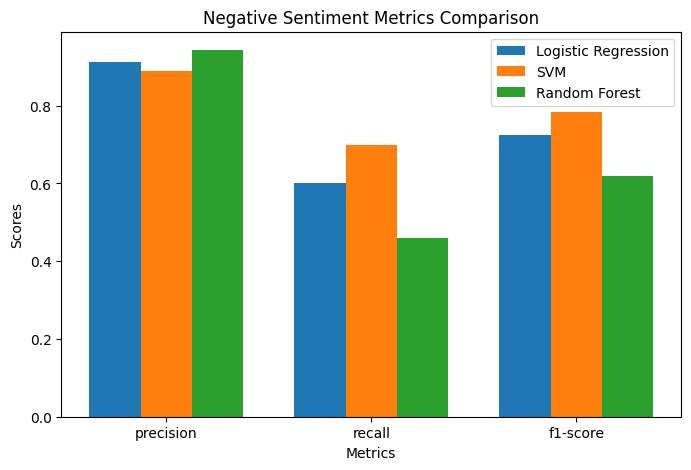

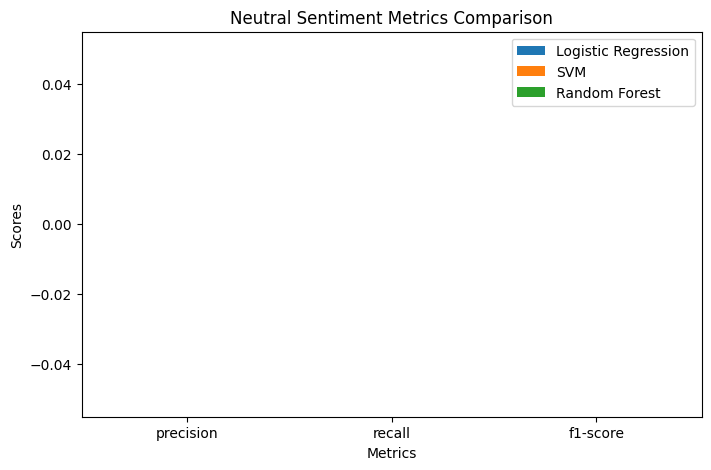

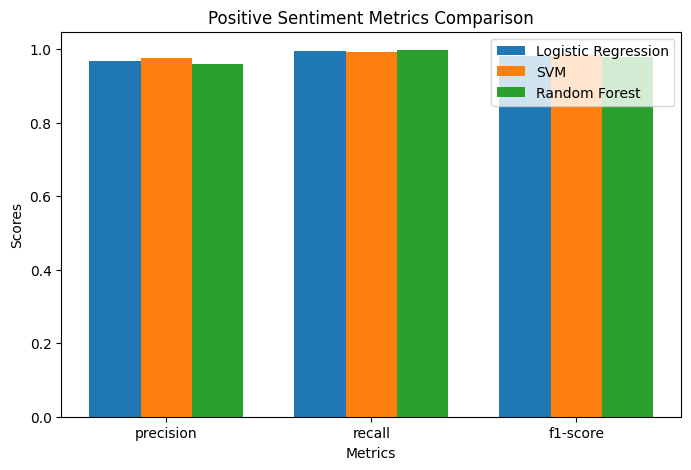

In [17]:
# Parse the classification report for Random Forest, Logistic Regression, and SVM
rf_metrics = classification_report(y_test, y_pred_rf, output_dict=True) # Changed y_test_full to y_test and y_pred_rf_full to y_pred_rf
logistic_metrics = classification_report(y_test_full, y_pred_logistic_full, output_dict=True)
svm_metrics = classification_report(y_test_full, y_pred_svm_full, output_dict=True)

# Metrics to compare
categories = ['precision', 'recall', 'f1-score']
labels = ['Negative', 'Neutral', 'Positive']

logistic_values = [
    [logistic_metrics.get(label, {}).get(metric, 0) for metric in categories] for label in labels
]

svm_values = [
    [svm_metrics.get(label, {}).get(metric, 0) for metric in categories] for label in labels
]

rf_values = [
    [rf_metrics.get(label, {}).get(metric, 0) for metric in categories] for label in labels
]

# Create bar charts for comparison
x = np.arange(len(categories))  # Label positions
width = 0.25  # Adjusted width for three bars

for i, label in enumerate(labels):
    plt.figure(figsize=(8, 5))
    plt.bar(x - width, logistic_values[i], width, label='Logistic Regression')
    plt.bar(x, svm_values[i], width, label='SVM')
    plt.bar(x + width, rf_values[i], width, label='Random Forest')

    # Add labels, title, and legend
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title(f'{label} Sentiment Metrics Comparison')
    plt.xticks(x, categories)
    plt.legend()
    plt.show()


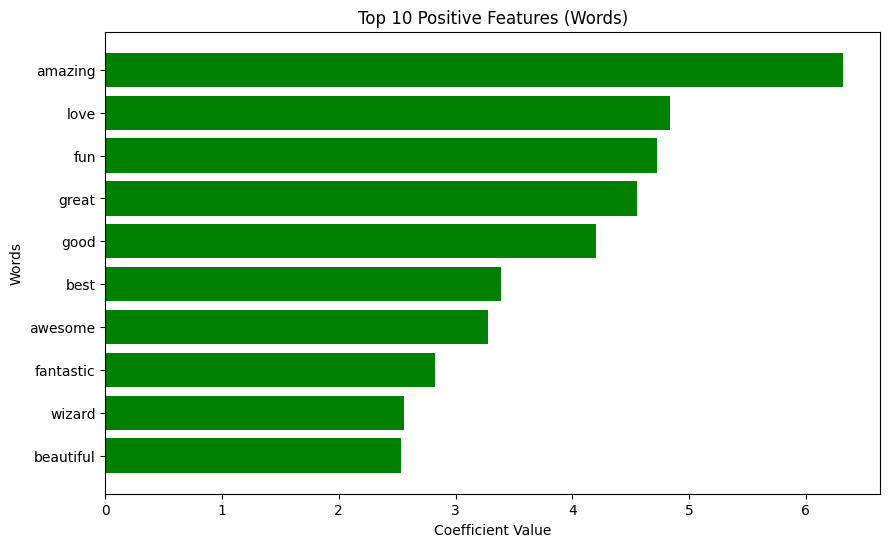

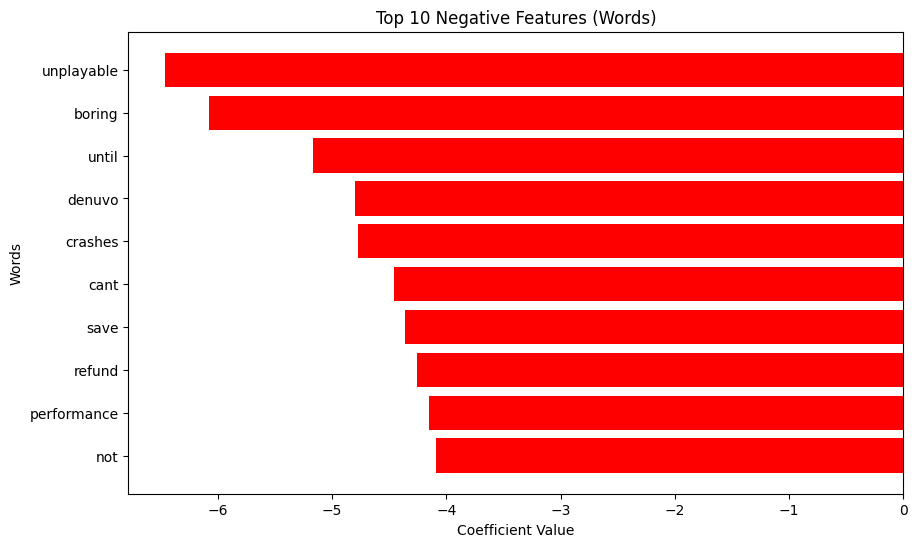

In [18]:
# Extract feature importance from Logistic Regression
feature_names = tfidf_vectorizer_full.get_feature_names_out()
coefficients = logistic_model_full.coef_[0]  # Coefficients for the first class (e.g., Negative sentiment)

# Get top 10 positive and negative coefficients
top_positive_coefficients = coefficients.argsort()[-10:][::-1]
top_negative_coefficients = coefficients.argsort()[:10]

# Create a dictionary to store the results for visualization
positive_features = {feature_names[idx]: coefficients[idx] for idx in top_positive_coefficients}
negative_features = {feature_names[idx]: coefficients[idx] for idx in top_negative_coefficients}

# Visualize the top features
plt.figure(figsize=(10, 6))
plt.barh(list(positive_features.keys()), list(positive_features.values()), color='green')
plt.title('Top 10 Positive Features (Words)')
plt.xlabel('Coefficient Value')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(list(negative_features.keys()), list(negative_features.values()), color='red')
plt.title('Top 10 Negative Features (Words)')
plt.xlabel('Coefficient Value')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()



In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],         # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize SVM classifier
svm_model = SVC()

# Perform Grid Search
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
svm_grid_search.fit(X_train_full, y_train_full)

# Get the best parameters and model
svm_best_params = svm_grid_search.best_params_
svm_best_model = svm_grid_search.best_estimator_

print("Best Hyperparameters for SVM:", svm_best_params)

# Evaluate SVM model
y_pred_svm_full = svm_best_model.predict(X_test_full)
print("SVM Classification Report:")
print(classification_report(y_test_full, y_pred_svm_full))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.69      0.78       721
    Positive       0.97      0.99      0.98      8560

    accuracy                           0.97      9281
   macro avg       0.94      0.84      0.88      9281
weighted avg       0.97      0.97      0.97      9281



In [22]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], # Regularization
    'C': [0.01, 0.1, 1, 10],                     # Inverse of regularization strength
    'solver': ['liblinear', 'saga']              # Solvers
}

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Perform Grid Search
lr_grid_search = GridSearchCV(estimator=logistic_model, param_grid=lr_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
lr_grid_search.fit(X_train_full, y_train_full)

# Get the best parameters and model
lr_best_params = lr_grid_search.best_params_
lr_best_model = lr_grid_search.best_estimator_

print("Best Hyperparameters for Logistic Regression:", lr_best_params)

# Evaluate Logistic Regression model
y_pred_logistic_full = lr_best_model.predict(X_test_full)
print("Logistic Regression Classification Report:")
print(classification_report(y_test_full, y_pred_logistic_full))


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.70      0.78       721
    Positive       0.97      0.99      0.98      8560

    accuracy                           0.97      9281
   macro avg       0.93      0.84      0.88      9281
weighted avg       0.97      0.97      0.97      9281



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [50, 100],  # Fewer trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum samples required to be a leaf node
}

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train_full, y_train_full)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_random_forest = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the model with the test set
y_pred_rf_full = best_random_forest.predict(X_test_full)
accuracy_rf = accuracy_score(y_test_full, y_pred_rf_full)
print(f"Optimized Random Forest Accuracy: {accuracy_rf:.2f}")

# Classification Report
report_rf = classification_report(y_test_full, y_pred_rf_full)
print("Classification Report for Optimized Random Forest:")
print(report_rf)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Optimized Random Forest Accuracy: 0.96
Classification Report for Optimized Random Forest:
              precision    recall  f1-score   support

    Negative       0.97      0.48      0.64       721
    Positive       0.96      1.00      0.98      8560

    accuracy                           0.96      9281
   macro avg       0.96      0.74      0.81      9281
weighted avg       0.96      0.96      0.95      9281



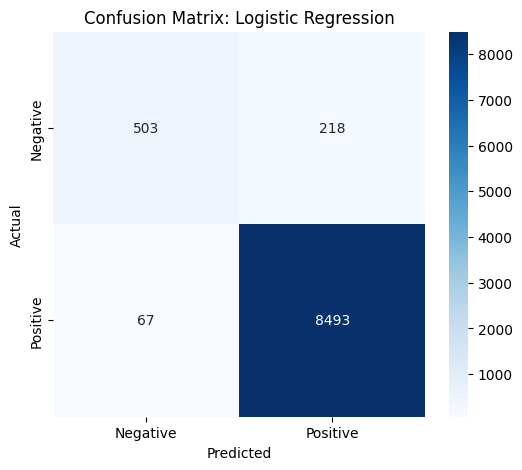

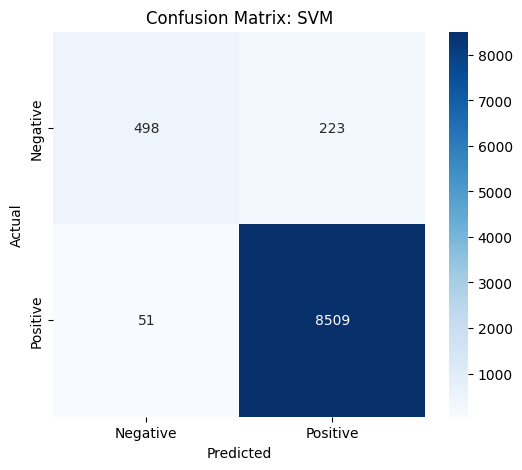

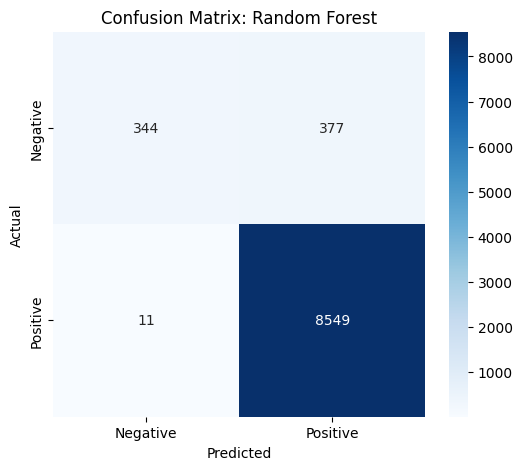

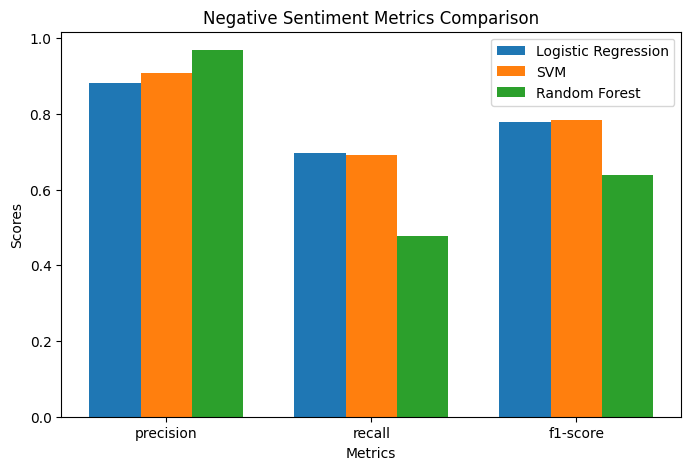

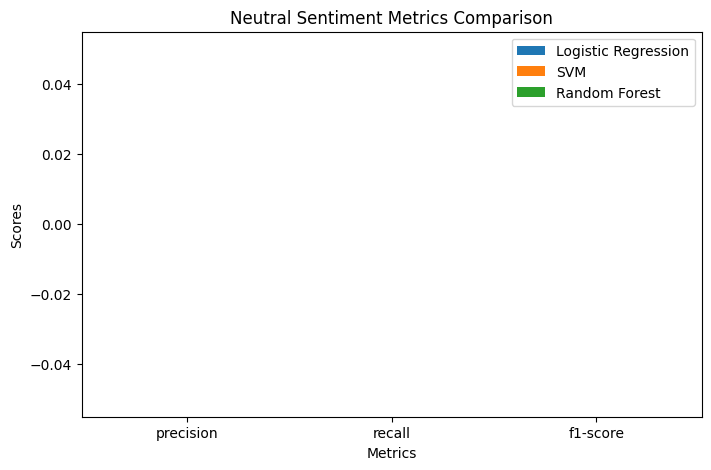

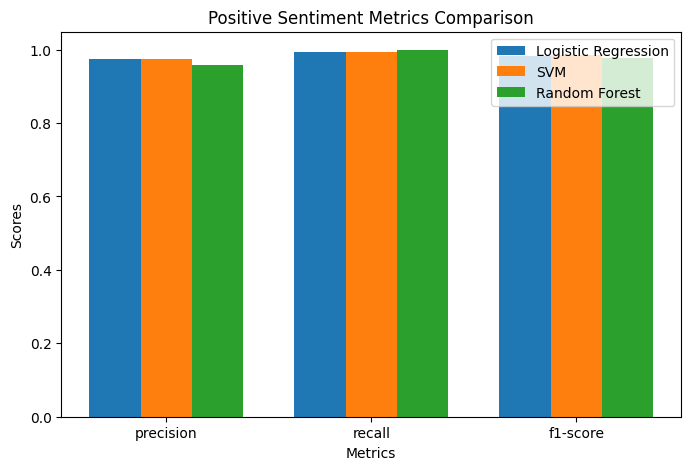

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Generate classification reports
logistic_metrics = classification_report(y_test_full, y_pred_logistic_full, output_dict=True)
svm_metrics = classification_report(y_test_full, y_pred_svm_full, output_dict=True)
rf_metrics = classification_report(y_test_full, y_pred_rf_full, output_dict=True)

# Generate confusion matrices
logistic_conf_matrix = confusion_matrix(y_test_full, y_pred_logistic_full)
svm_conf_matrix = confusion_matrix(y_test_full, y_pred_svm_full)
rf_conf_matrix = confusion_matrix(y_test_full, y_pred_rf_full)

# Plot confusion matrices
plot_confusion_matrix(logistic_conf_matrix, "Confusion Matrix: Logistic Regression")
plot_confusion_matrix(svm_conf_matrix, "Confusion Matrix: SVM")
plot_confusion_matrix(rf_conf_matrix, "Confusion Matrix: Random Forest")

# Extract metrics for each model
categories = ['precision', 'recall', 'f1-score']
labels = ['Negative', 'Neutral', 'Positive']

logistic_values = [
    [logistic_metrics.get(label, {}).get(metric, 0) for metric in categories] for label in labels
]

svm_values = [
    [svm_metrics.get(label, {}).get(metric, 0) for metric in categories] for label in labels
]

rf_values = [
    [rf_metrics.get(label, {}).get(metric, 0) for metric in categories] for label in labels
]

# Create bar charts
x = np.arange(len(categories))  # Label positions
width = 0.25  # Adjusted width for three bars

for i, label in enumerate(labels):
    plt.figure(figsize=(8, 5))
    plt.bar(x - width, logistic_values[i], width, label='Logistic Regression')
    plt.bar(x, svm_values[i], width, label='SVM')
    plt.bar(x + width, rf_values[i], width, label='Random Forest')

    # Add labels, title, and legend
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title(f'{label} Sentiment Metrics Comparison')
    plt.xticks(x, categories)
    plt.legend()
    plt.show()


In [36]:
# Step 1: Install Gradio
!pip install gradio

import gradio as gr
import re

# Step 2: Preprocessing function
def preprocess_text_simplified(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    stop_words = {'the', 'and', 'is', 'it', 'a', 'of', 'in', 'to', 'on', 'for', 'with', 'at', 'this', 'that'}
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Step 3: Define the prediction function
def predict_sentiment(review):
    # Preprocess the review
    cleaned_review = preprocess_text_simplified(review)
    # Convert the review to TF-IDF vector
    vectorized_review = tfidf_vectorizer_full.transform([cleaned_review])
    # Predict sentiment
    sentiment = logistic_model_full.predict(vectorized_review)[0]
    return sentiment

# Step 4: Create Gradio Interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=2, placeholder="Enter a review..."),
    outputs=gr.Label(label="Predicted Sentiment"),
    title="Sentiment Analysis Tool",
    description="This tool predicts the sentiment of a review as Positive, Negative, or Neutral.",
    live=True,
)

# Step 5: Launch the Interface
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ff56af55c0a059c510.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
